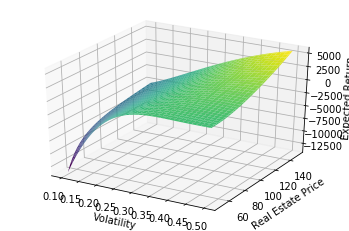

In [3]:
import numpy as np

# Define the parameters of the call option
S0 = 200    # initial real-estate price
K = 110     # strike price
T = 1       # time to maturity
r = 0.05    # risk-free interest rate
sigma = 0.2 # volatility of the underlying asset

# Define the range of stock prices and volatilities to consider
S_range = np.linspace(50, 150, 101)
sigma_range = np.linspace(0.1, 0.5, 101)

# Define the degree of the polynomial approximation
degree = 4

# Define a function to calculate the payoff of a call option
def call_payoff(S, K):
    return np.maximum(S - K, 0)

# Define a function to calculate the expected returns of a "long gamma" strategy
def long_gamma_returns(S, K, T, r, sigma, degree):
    # Calculate the expected return for each combination of S and sigma
    returns = np.zeros((len(S), len(sigma)))
    for i in range(len(S)):
        for j in range(len(sigma)):
            # Calculate the polynomial approximation of the call option payoff
            x = (np.log(S[i]/K) + (r + sigma[j]**2/2)*T) / (sigma[j]*np.sqrt(T))
            poly_approx = np.polyval(np.polyfit([0, 1, 2, 3, 4], [0, 1, 1/2, 1/6, 1/24], degree), x)
            # Calculate the expected return of the long gamma strategy
            returns[i, j] = poly_approx * S[i]**2 * sigma[j]**2 * T - (r - sigma[j]**2/2) * S[i] * poly_approx
    return returns

# Calculate the expected returns of the long gamma strategy
returns = long_gamma_returns(S_range, K, T, r, sigma_range, degree)

# Plot the expected returns as a function of stock price and volatility
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(sigma_range, S_range)
ax.plot_surface(X, Y, returns.T, cmap=plt.cm.viridis)
ax.set_xlabel('Volatility')
ax.set_ylabel('Real Estate Price')
ax.set_zlabel('Expected Return')
plt.show()

In [6]:
import numpy as np

# Define input parameters
purchase_price = 500000 # CHF
down_payment_percent = 20
years = 10
rent_monthly = 1500 # CHF
refi_cost_percent = 1
n_terms = 3

# Calculate derived parameters
mortgage_amount = purchase_price * (1 - down_payment_percent/100)
n_months = years * 12

# Define function for monthly mortgage payment
def monthly_payment(rate):
    return mortgage_amount * (rate/12) / (1 - (1 + rate/12)**(-n_months))

# Define function for total cost of renting
def renting_cost():
    return rent_monthly * n_months

# Define function for total cost of buying
def total_cost(rate):
    loan_amount = mortgage_amount
    refi_cost = 0
    for i in range(n_months):
        payment = monthly_payment(rate)
        interest = loan_amount * rate / 12
        principal = payment - interest
        loan_amount -= principal
        if i % 12 == 0:
            refi_cost += refi_cost_percent/100 * loan_amount
    return refi_cost + down_payment_percent/100*purchase_price + loan_amount

# Define function for Taylor series approximation of total cost around a reference rate
def taylor_approximation(x, n_terms):
    if np.isscalar(x):
        return (-1)**n_terms * x**(2*n_terms) / np.math.factorial(2*n_terms)
    else:
        approximations = np.zeros(len(x))
        for n in range(n_terms):
            approximations += (-1)**n * x**(2*n) / np.math.factorial(2*n)
        return approximations

# Set reference rate and calculate actual total cost
rate_ref = 0.03
cost_actual = total_cost(rate_ref)

# Calculate Taylor series approximation of total cost over a range of interest rates
interest_rates = np.linspace(0, 0.1, 101)
costs_approx = total_cost(rate_ref) + taylor_approximation(rate_ref, n_terms) * (interest_rates - rate_ref)**2

# Calculate actual total cost over the same range of interest rates
costs_actual = np.array([total_cost(rate) for rate in interest_rates])

# Print results
print("Actual total cost at reference rate: CHF {:.2f}".format(cost_actual))
print("Approximate total cost at reference rate: CHF {:.2f}".format(costs_approx[50]))
print("Actual total cost range: CHF {:.2f} - {:.2f}".format(np.min(costs_actual), np.max(costs_actual)))
print("Approximate total cost range: CHF {:.2f} - {:.2f}".format(np.min(costs_approx), np.max(costs_approx)))


Actual total cost at reference rate: CHF 122658.50
Approximate total cost at reference rate: CHF 122658.50
Actual total cost range: CHF nan - nan
Approximate total cost range: CHF 122658.50 - 122658.50


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


In [8]:
import numpy as np

# Define function for total cost of a project
def total_cost(rate):
    fixed_cost = 1000000
    variable_cost = 50000
    return fixed_cost + variable_cost / rate

# Define function for Taylor series approximation of total cost around a reference rate
def taylor_approximation(x, n_terms):
    x = np.array([x])  # Make sure x is an array
    approximations = np.zeros(len(x))
    for n in range(n_terms):
        approximations += (-1)**n * x**(2*n) / np.math.factorial(2*n)
    return approximations

# Set reference interest rate and number of terms for Taylor series
rate_ref = 0.05
n_terms = 5

# Calculate actual total cost at reference rate
cost_ref = total_cost(rate_ref)
print(f"Actual total cost at reference rate: CHF {cost_ref:.2f}")

# Calculate Taylor series approximation of total cost over a range of interest rates
interest_rates = np.linspace(0, 0.1, 101)
costs_approx = cost_ref + taylor_approximation(rate_ref, n_terms) * (interest_rates - rate_ref)**2

# Calculate actual total cost over the same range of interest rates
costs_actual = np.zeros(len(interest_rates))
for i in range(len(interest_rates)):
    costs_actual[i] = total_cost(interest_rates[i])

# Print results
print(f"Approximate total cost at reference rate: CHF {costs_approx[50]:.2f}")
print(f"Actual total cost range: CHF {costs_actual.min():.2f} - {costs_actual.max():.2f}")
print(f"Approximate total cost range: CHF {costs_approx.min():.2f} - {costs_approx.max():.2f}")


Actual total cost at reference rate: CHF 2000000.00
Approximate total cost at reference rate: CHF 2000000.00
Actual total cost range: CHF 1500000.00 - inf
Approximate total cost range: CHF 2000000.00 - 2000000.00
